# Laboratorio 7

* Asuma que las operaciones requieren alta precisión.
* Presente su solución con el nombre `lab7_codigoPUCP.ipynb`

In [488]:
import numpy
ns = 2**numpy.arange(5,15)
print(ns)

[   32    64   128   256   512  1024  2048  4096  8192 16384]


a) Implementar (en un único archivo) cuatro funciones en C que acumule el producto interno de dos arreglos números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [489]:
%%file parte_a.c
#include <stdio.h>
#include <stdint.h>

double funcion1(double *arr1, double *arr2, int N){
    double productoP = 0.0;
    for (int i =0; i < N;i++){
        productoP = (arr1[i])*(arr2[i]) + productoP;
    }
    return productoP;
}
double funcion2(double *arr1, double *arr2, int N){
    double productoP = 0.0;
    for (int i =0; i < N; i+=2){
        productoP = (arr1[i]*arr2[i]) + (arr1[i+1]*arr2[i+1]) + productoP;
    }
    return productoP;
}

double funcion3(double *arr1, double *arr2, int N){
    double productoP = 0.0;
    for (int i =0; i <N; i+=4){
        productoP = (arr1[i]*arr2[i])+ (arr1[i+1]*arr2[i+1]) + (arr1[i+2]*arr2[i+2]) + (arr1[i+3]*arr2[i+3]) + productoP;
    }
    return productoP;
}

double funcion4(double *arr1, double *arr2, int N){
    double productoP = 0.0;
    for (int i =0; i <N; i+=8){
        productoP = (arr1[i]*arr2[i]) + (arr1[i+1]*arr2[i+1]) + (arr1[i+2]*arr2[i+2]) + (arr1[i+3]*arr2[i+3]) + (arr1[i+4]*arr2[i+4]) + (arr1[i+5]*arr2[i+5])+(arr1[i+6]*arr2[i+6]) + (arr1[i+7]*arr2[i+7]) + productoP;
    }
    return productoP;
}

Overwriting parte_a.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [490]:
! gcc -c  parte_a.c

In [491]:

! gcc -shared parte_a.o -o parte_a.so 

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [492]:
import ctypes
import numpy as np
def ctypes_funciones():
    lib= './parte_a.so'
    lib=ctypes.CDLL(lib)
    #funcion1 que agrupa de 1 en 1
    lib.funcion1.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion1.restype=ctypes.c_double
    #funcion2 que agrupa de 2 en 2
    lib.funcion2.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion2.restype=ctypes.c_double
    #funcion3 que agrupa de 4 en 4
    lib.funcion3.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion3.restype=ctypes.c_double
    #funcion4 que agrupa de 8 en 8
    lib.funcion4.argtypes=[numpy.ctypeslib.ndpointer(dtype=numpy.double),numpy.ctypeslib.ndpointer(dtype=numpy.double), ctypes.c_int32]
    lib.funcion4.restype=ctypes.c_double

    return lib.funcion1,lib.funcion2,lib.funcion3,lib.funcion4

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [493]:
funcion1_c,funcion2_c,funcion3_c,funcion4_c =ctypes_funciones()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns`, y muestre que dan el mismo resultado. Completar la información para generar dos arreglos.(1.25 ptos)

In [494]:
n = ns[0]
a = numpy.random.rand(n,1)
b = numpy.random.rand(n,1)

r1 = funcion1_c(a,b, n)
r2 = funcion2_c(a,b, n)
r3 = funcion3_c(a,b, n)
r4 = funcion4_c(a,b, n)

print(r1)
print(r2)
print(r3)
print(r4)

7.813665234911219
7.81366523491122
7.81366523491122
7.813665234911219


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns`, y muestre que dan el mismo resultado. Completar nuevamente los arreglos a y b (1.25 ptos)

In [495]:
n = ns[-1]
a = numpy.random.rand(n,1)
b = numpy.random.rand(n,1)

r1 = funcion1_c(a,b, n)
r2 = funcion2_c(a,b, n)
r3 = funcion3_c(a,b, n)
r4 = funcion4_c(a,b, n)

print(r1)
print(r2)
print(r3)
print(r4)

4096.952794128856
4096.952794128845
4096.9527941288425
4096.952794128846


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [496]:
import time
import statistics
import matplotlib.pyplot as plt

medicion1=[]
medicion2=[]
medicion3=[]
medicion4=[]

iterations=50
for n in ns:
    a = numpy.random.rand(n,1)
    b = numpy.random.rand(n,1)
    l1=[]
    l2=[]
    l3=[]
    l4=[]
    for _ in range(iterations):

        t1= time.perf_counter()
        funcion1_c(a,b,n)
        t2= time.perf_counter()
        funcion2_c(a,b,n)
        t3= time.perf_counter()
        funcion3_c(a,b,n)
        t4= time.perf_counter()
        funcion4_c(a,b,n)
        t5= time.perf_counter()

        l1.append(t2-t1)
        l2.append(t3-t2)
        l3.append(t4-t3)
        l4.append(t5-t4)

    medicion1.append(statistics.median(l1))
    medicion2.append(statistics.median(l2))
    medicion3.append(statistics.median(l3))
    medicion4.append(statistics.median(l4))

print(medicion1)
print(medicion2)
print(medicion3)
print(medicion4)

[1.0010000096372096e-05, 1.0332499641663162e-05, 1.0638500043569366e-05, 1.1129000540677225e-05, 1.1336499937897315e-05, 1.2177499684185022e-05, 1.4935999843146419e-05, 2.0667000171670225e-05, 3.0989500373834744e-05, 4.669999952966464e-05]
[9.921499895426678e-06, 1.0124999789695721e-05, 1.0119000307895476e-05, 1.069349991666968e-05, 1.0658500286808703e-05, 1.1004499356204178e-05, 1.2899499779450707e-05, 1.6338000477844616e-05, 2.255649997096043e-05, 3.1924999802868115e-05]
[9.825499546423089e-06, 1.0048499461845495e-05, 1.0189499789703405e-05, 1.0640999789757188e-05, 1.05844997051463e-05, 1.0700000075303251e-05, 1.2268499631318264e-05, 1.547600004414562e-05, 2.0880999727523886e-05, 2.886850006689201e-05]
[9.674499779066537e-06, 9.975500233849743e-06, 1.0016500255005667e-05, 1.0454499715706334e-05, 1.0391499927209225e-05, 1.0632999874360394e-05, 1.226900030815159e-05, 1.5260500276781386e-05, 2.027749997068895e-05, 2.7688999580277596e-05]


h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

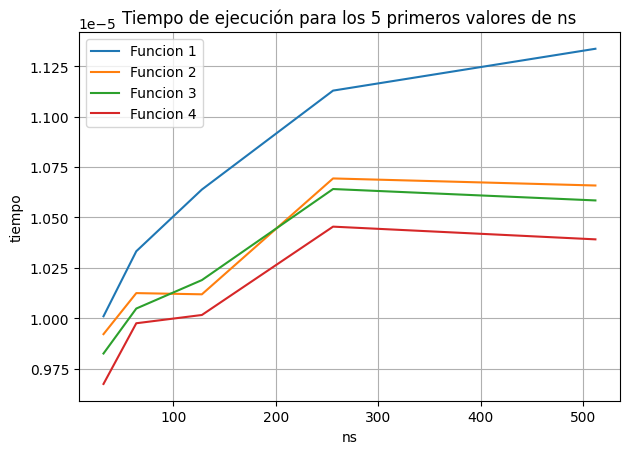

In [497]:
plt.plot(ns[:5],medicion1[:5], label = 'Funcion 1')
plt.plot(ns[:5],medicion2[:5], label = 'Funcion 2')
plt.plot(ns[:5],medicion3[:5], label = 'Funcion 3')
plt.plot(ns[:5],medicion4[:5], label = 'Funcion 4')
plt.xlabel("ns")
plt.ylabel("tiempo")
plt.legend()
plt.grid()
plt.title('Tiempo de ejecución para los 5 primeros valores de ns')
plt.tight_layout()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

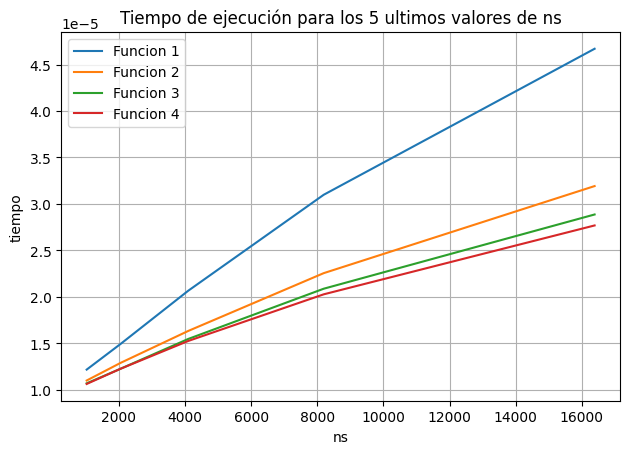

In [498]:
plt.plot(ns[5:],medicion1[5:], label = 'Funcion 1')
plt.plot(ns[5:],medicion2[5:], label = 'Funcion 2')
plt.plot(ns[5:],medicion3[5:], label = 'Funcion 3')
plt.plot(ns[5:],medicion4[5:], label = 'Funcion 4')
plt.xlabel("ns")
plt.ylabel("tiempo")
plt.legend()
plt.grid()
plt.title('Tiempo de ejecución para los 5 ultimos valores de ns')
plt.tight_layout()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

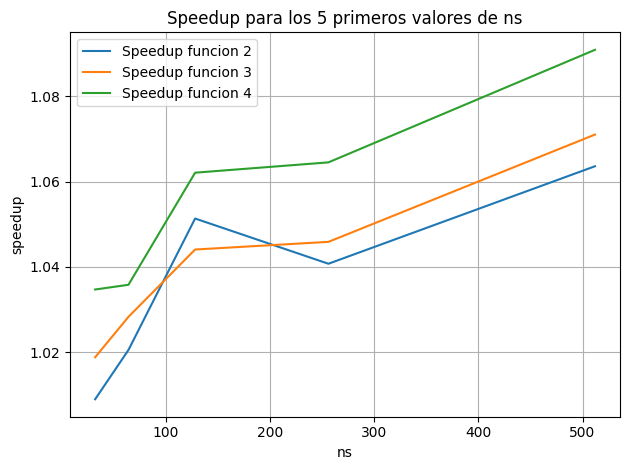

In [499]:

plt.plot(ns[:5], numpy.asarray(medicion1[:5])/numpy.asarray(medicion2[:5]), label='Speedup funcion 2' )
plt.plot(ns[:5], numpy.asarray(medicion1[:5])/numpy.asarray(medicion3[:5]),label='Speedup funcion 3' )
plt.plot(ns[:5], numpy.asarray(medicion1[:5])/numpy.asarray(medicion4[:5]),label='Speedup funcion 4' )

plt.xlabel("ns")
plt.ylabel("speedup")
plt.grid()
plt.legend()
plt.title('Speedup para los 5 primeros valores de ns')
plt.tight_layout()

k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco ultimos valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

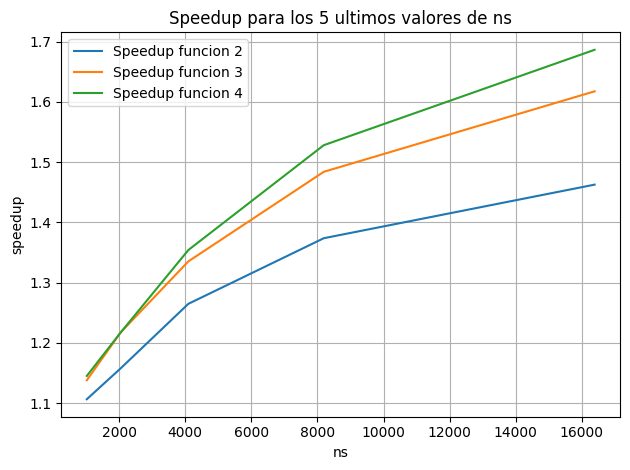

In [500]:
plt.plot(ns[5:], numpy.asarray(medicion1[5:])/numpy.asarray(medicion2[5:]), label='Speedup funcion 2' )
plt.plot(ns[5:], numpy.asarray(medicion1[5:])/numpy.asarray(medicion3[5:]),label='Speedup funcion 3' )
plt.plot(ns[5:], numpy.asarray(medicion1[5:])/numpy.asarray(medicion4[5:]),label='Speedup funcion 4' )

plt.xlabel("ns")
plt.ylabel("speedup")
plt.grid()
plt.legend()
plt.title('Speedup para los 5 ultimos valores de ns')
plt.tight_layout()

l) Extraer las características de la memoria caché de su computador (0.5)

In [501]:
! lscpu --cache

NAME ONE-SIZE ALL-SIZE WAYS TYPE        LEVEL SETS PHY-LINE COHERENCY-SIZE
L1d       32K      64K    8 Data            1   64        1             64
L1i       32K      64K    8 Instruction     1   64        1             64
L2       256K     512K    4 Unified         2 1024        1             64
L3         8M      16M   16 Unified         3 8192        1             64


In [502]:
! lscpu | grep -i cache

L1d cache:                       64 KiB (2 instances)
L1i cache:                       64 KiB (2 instances)
L2 cache:                        512 KiB (2 instances)
L3 cache:                        16 MiB (2 instances)


m) Explique sus resultados de las implementaciones empleando conceptos de memoria caché. (3.5 ptos)

Se concluye a partir de lo analizado en las gráficas que el tiempo de ejecución que para la primera función el tiempo es mayor en comparación con las demás funciones, esto se debe a que realiza más llamadas de lectura a la memoria principal, además de acceder a los datos de manera secuencial. La caché que utiliza sería L1d de datos, la cual tiene un tamaño más pequeño. En el caso de la función 2, los elementos necesarios están en la caché (posiblemente L2) cuando se accede a ellos, ya que los agrupa de 2 en 2. Esto permite aprovechar la localidad espacial, lo que también significaría un tiempo de ejecución menor. De manera análoga, en las funciones 3 y 4, estas son las que aprovechan mejor la localidad espacial, ya que agrupan una mayor cantidad de datos en la memoria caché. Según la estructura de mi computadora, estos datos deberían estar en una de las cachés de mayor tamaño, como L2 y L3, o en todas. Además, podemos observar que al comparar los speedups de las demás funciones con respecto a la primera función, notamos que la función 4 es más rápida que la 3, y esta a su vez es más rápida que la 2, lo cual verifica el aprovechamiento de la localidad espacial




